In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# dataset to use will be california housing

from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

In [69]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [70]:
cal_df=pd.DataFrame(cal.data,columns=cal.feature_names)
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [71]:
cal_df['MedHouseVal']=housing.target
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [72]:
#obtain the data type in each column
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
# check the descriptive summary of the data
cal_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [74]:
#change MedInc and MedHouseVal to original values
cal_df['MedInc']=cal_df['MedInc']*10000
cal_df['MedHouseVal']=cal_df['MedHouseVal']*100000
cal_df



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,15603.0,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,25568.0,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,17000.0,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,18672.0,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


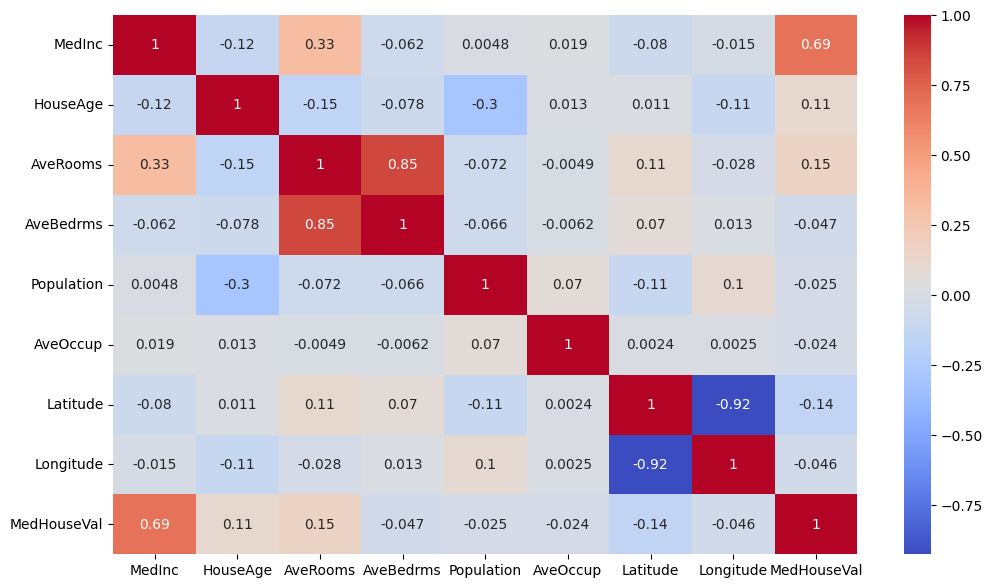

In [75]:
#start exploring the data set
plt.figure(figsize=(12,7))
sns.heatmap(cal_df.corr(),annot=True, cmap="coolwarm")
plt.show()

In [76]:
#start building the model

# we first split the data into input var and target variable

X=cal_df.drop('MedHouseVal',axis=1) #input columns
y=cal_df['MedHouseVal'] #target column

#split X & Y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [77]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,42143.0,37.0,5.288235,0.973529,860.0,2.529412,33.81,-118.12
18368,53468.0,42.0,6.364322,1.087940,957.0,2.404523,37.16,-121.98
19197,39191.0,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69
3746,63703.0,32.0,6.000000,0.990196,1159.0,2.272549,34.16,-118.41
13073,23684.0,17.0,4.795858,1.035503,706.0,2.088757,38.57,-121.33
...,...,...,...,...,...,...,...,...
11284,63700.0,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,30500.0,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,29344.0,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,57192.0,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [78]:
y_train

,MedHouseVal
8158,228500.0
18368,279900.0
19197,183000.0
3746,465800.0
13073,150000.0
...,...
11284,229200.0
11964,97800.0
5390,222100.0
860,283500.0


In [79]:
# initialize the model
lr=LinearRegression()

#train the model
lr.fit(X_train,y_train)

# test the model
y_pred=lr.predict(X_test)

In [80]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
20046,47700.0,72412.832492
3024,45800.0,176677.807397
15663,500001.0,271151.580830
20484,218600.0,283601.178727
9814,278000.0,260375.499666
...,...,...
5363,500001.0,357785.017248
19755,63200.0,56769.919437
4885,117700.0,172382.152108
13043,263100.0,234689.276252


In [81]:
r2_score(y_test,y_pred)

0.591050979549135

In [82]:
# import and additional model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [83]:
r2_score(y_test,y_pred_rf)

0.8065335854067108

In [66]:
import pickle
pickle.dump(rf,open('cal_housing_model_rf.pkl','wb'))

In [84]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')